In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from fim import apriori


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fim import apriori
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import plot_confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns

In [179]:
df=pd.read_csv("../prepared_ravdess_features.csv")
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,speech,fearful,normal,Dogs are sitting by the door,2nd,F,2,3737,16995,-33.485947,...,0.335533,0.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,speech,angry,normal,Dogs are sitting by the door,1st,F,2,3904,13906,-29.502108,...,0.352380,0.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,speech,happy,strong,Dogs are sitting by the door,2nd,F,2,4671,18723,-30.532463,...,0.352270,0.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,speech,surprised,normal,Kids are talking by the door,1st,F,2,3637,11617,-36.059555,...,0.360552,0.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,song,happy,strong,Dogs are sitting by the door,2nd,F,2,4404,15137,-31.405996,...,0.350655,0.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [180]:
# eliminazione variabili con tanti valori costanti e inutili
to_delete=["frame_width","mfcc_mean","mfcc_std","mfcc_min","mfcc_max","sc_mean","sc_std","sc_min","sc_max","sc_kur","sc_skew","stft_mean","stft_std","stft_min","stft_kur","stft_skew"]

df_clean=df.copy()
df_clean=df_clean.drop(to_delete,axis=1)


to_delete2=["statement","repetition"]
df_clean=df_clean.drop(to_delete2,axis=1)
df_clean

,vocal_channel,emotion,emotional_intensity,sex,length_ms,zero_crossings_sum,mean,std,min,max,kur,skew
0,speech,fearful,normal,F,3737,16995,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,speech,angry,normal,F,3904,13906,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,speech,happy,strong,F,4671,18723,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,speech,surprised,normal,F,3637,11617,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,song,happy,strong,F,4404,15137,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872
...,...,...,...,...,...,...,...,...,...,...,...,...
2412,speech,calm,strong,M,4605,9871,9.367040e-07,0.005260,-0.039856,0.052399,9.551363,0.759247
2413,speech,calm,normal,M,4171,8963,4.614221e-07,0.006836,-0.064178,0.084045,22.517991,1.073633
2414,song,sad,strong,M,5239,9765,-8.219263e-06,0.015384,-0.093079,0.097260,4.964319,-0.005821
2415,speech,surprised,normal,M,3737,9716,-4.400898e-06,0.005182,-0.057556,0.052002,13.855588,-0.110966


In [181]:
df_clean["length_ms_BIN"] = pd.qcut(df_clean["length_ms"], 4)
df_clean["zero_crossings_sum_BIN"] = pd.qcut(df_clean["zero_crossings_sum"], 4)
df_clean["mean_BIN"] = pd.qcut(df_clean["mean"], 4)
df_clean["std_BIN"] = pd.qcut(df_clean["std"], 4)
df_clean["min_BIN"] = pd.qcut(df_clean["min"], 4)
df_clean["max_BIN"] = pd.qcut(df_clean["max"], 4)
df_clean["kur_BIN"] = pd.qcut(df_clean["kur"], 4)
df_clean["skew_BIN"] = pd.qcut(df_clean["skew"], 4)

df_clean=df_clean.drop(["length_ms","zero_crossings_sum","mean","std","min","max","kur","skew"],axis=1)



df_clean["length_ms_BIN"] = df_clean["length_ms_BIN"].astype(str) + "_Length"
df_clean["zero_crossings_sum_BIN"] = df_clean["zero_crossings_sum_BIN"].astype(str) + "_Zcs"
df_clean["mean_BIN"] = df_clean["mean_BIN"].astype(str) + "_Mean"
df_clean["std_BIN"] = df_clean["std_BIN"].astype(str) + "_Std"
df_clean["min_BIN"] = df_clean["min_BIN"].astype(str) + "_Min"
df_clean["max_BIN"] = df_clean["max_BIN"].astype(str) + "_Max"
df_clean["kur_BIN"] = df_clean["kur_BIN"].astype(str) + "_Kur"
df_clean["skew_BIN"] = df_clean["skew_BIN"].astype(str) + "_Skew"
df_clean["vocal_channel"] = df_clean["vocal_channel"].astype(str) + "_Vc"
df_clean["emotion"] = df_clean["emotion"].astype(str) + "_Emotion"
df_clean["emotional_intensity"] = df_clean["emotional_intensity"].astype(str) + "_Intensity"




df_clean

,vocal_channel,emotion,emotional_intensity,sex,length_ms_BIN,zero_crossings_sum_BIN,mean_BIN,std_BIN,min_BIN,max_BIN,kur_BIN,skew_BIN
0,speech_Vc,fearful_Emotion,normal_Intensity,F,"(3604.0, 4004.0]_Length","(14959.0, 30153.0]_Zcs","(-9.8e-08, 8.37e-07]_Mean","(0.0139, 0.0262]_Std","(-0.203, -0.104]_Min","(0.109, 0.225]_Max","(6.53, 9.834]_Kur","(0.263, 1.8]_Skew"
1,speech_Vc,angry_Emotion,normal_Intensity,F,"(3604.0, 4004.0]_Length","(12379.0, 14959.0]_Zcs","(-9.8e-08, 8.37e-07]_Mean","(0.0139, 0.0262]_Std","(-1.0, -0.203]_Min","(0.225, 0.999]_Max","(14.095, 59.086]_Kur","(0.263, 1.8]_Skew"
2,speech_Vc,happy_Emotion,strong_Intensity,F,"(4538.0, 6373.0]_Length","(14959.0, 30153.0]_Zcs","(8.37e-07, 0.00122]_Mean","(0.0139, 0.0262]_Std","(-0.203, -0.104]_Min","(0.109, 0.225]_Max","(1.7570000000000001, 6.53]_Kur","(0.263, 1.8]_Skew"
3,speech_Vc,surprised_Emotion,normal_Intensity,F,"(3604.0, 4004.0]_Length","(10359.0, 12379.0]_Zcs","(-9.8e-08, 8.37e-07]_Mean","(-0.000348, 0.00677]_Std","(-0.0544, -0.00613]_Min","(0.0036699999999999997, 0.0554]_Max","(9.834, 14.095]_Kur","(-0.338, 0.00195]_Skew"
4,song_Vc,happy_Emotion,strong_Intensity,F,"(4004.0, 4538.0]_Length","(14959.0, 30153.0]_Zcs","(8.37e-07, 0.00122]_Mean","(0.0262, 0.152]_Std","(-0.203, -0.104]_Min","(0.225, 0.999]_Max","(6.53, 9.834]_Kur","(0.263, 1.8]_Skew"
...,...,...,...,...,...,...,...,...,...,...,...,...
2412,speech_Vc,calm_Emotion,strong_Intensity,M,"(4538.0, 6373.0]_Length","(4720.999, 10359.0]_Zcs","(8.37e-07, 0.00122]_Mean","(-0.000348, 0.00677]_Std","(-0.0544, -0.00613]_Min","(0.0036699999999999997, 0.0554]_Max","(6.53, 9.834]_Kur","(0.263, 1.8]_Skew"
2413,speech_Vc,calm_Emotion,normal_Intensity,M,"(4004.0, 4538.0]_Length","(4720.999, 10359.0]_Zcs","(-9.8e-08, 8.37e-07]_Mean","(0.00677, 0.0139]_Std","(-0.104, -0.0544]_Min","(0.0554, 0.109]_Max","(14.095, 59.086]_Kur","(0.263, 1.8]_Skew"
2414,song_Vc,sad_Emotion,strong_Intensity,M,"(4538.0, 6373.0]_Length","(4720.999, 10359.0]_Zcs","(-0.001944, -1.41e-06]_Mean","(0.0139, 0.0262]_Std","(-0.104, -0.0544]_Min","(0.0554, 0.109]_Max","(1.7570000000000001, 6.53]_Kur","(-0.338, 0.00195]_Skew"
2415,speech_Vc,surprised_Emotion,normal_Intensity,M,"(3604.0, 4004.0]_Length","(4720.999, 10359.0]_Zcs","(-0.001944, -1.41e-06]_Mean","(-0.000348, 0.00677]_Std","(-0.104, -0.0544]_Min","(0.0036699999999999997, 0.0554]_Max","(9.834, 14.095]_Kur","(-0.338, 0.00195]_Skew"


In [182]:
original_df=df_clean.copy()
original_df2 = df_clean.copy()

In [183]:
for i in df_clean.columns:
    df_clean[i] = df_clean[i].astype(str) + '/'+i

In [184]:
# Creazione basket di transazioni

X=df_clean.values.tolist()
X[2]

['speech_Vc/vocal_channel',
 'happy_Emotion/emotion',
 'strong_Intensity/emotional_intensity',
 'F/sex',
 '(4538.0, 6373.0]_Length/length_ms_BIN',
 '(14959.0, 30153.0]_Zcs/zero_crossings_sum_BIN',
 '(8.37e-07, 0.00122]_Mean/mean_BIN',
 '(0.0139, 0.0262]_Std/std_BIN',
 '(-0.203, -0.104]_Min/min_BIN',
 '(0.109, 0.225]_Max/max_BIN',
 '(1.7570000000000001, 6.53]_Kur/kur_BIN',
 '(0.263, 1.8]_Skew/skew_BIN']

# Predict target

In [185]:
rules= apriori(X, target = "r", supp=10, conf=60, zmin=4, report='aScl', mode='o')
for i in rules:
    print("***** Antecedente della regola: ")
    print(i[1])

print("Rules Count:",len(rules))

***** Antecedente della regola: 
('(0.0262, 0.152]_Std/std_BIN', '(0.225, 0.999]_Max/max_BIN', '(14959.0, 30153.0]_Zcs/zero_crossings_sum_BIN')
***** Antecedente della regola: 
('(0.0262, 0.152]_Std/std_BIN', '(14959.0, 30153.0]_Zcs/zero_crossings_sum_BIN', '(-1.0, -0.203]_Min/min_BIN')
***** Antecedente della regola: 
('(0.225, 0.999]_Max/max_BIN', '(14959.0, 30153.0]_Zcs/zero_crossings_sum_BIN', '(-1.0, -0.203]_Min/min_BIN')
***** Antecedente della regola: 
('(0.0262, 0.152]_Std/std_BIN', '(0.225, 0.999]_Max/max_BIN', '(-1.0, -0.203]_Min/min_BIN', 'F/sex')
***** Antecedente della regola: 
('(0.0262, 0.152]_Std/std_BIN', '(0.225, 0.999]_Max/max_BIN', 'strong_Intensity/emotional_intensity', 'F/sex')
***** Antecedente della regola: 
('(0.0262, 0.152]_Std/std_BIN', '(-1.0, -0.203]_Min/min_BIN', 'strong_Intensity/emotional_intensity', 'F/sex')
***** Antecedente della regola: 
('(0.225, 0.999]_Max/max_BIN', '(-1.0, -0.203]_Min/min_BIN', 'strong_Intensity/emotional_intensity', 'F/sex')
****

In [186]:
df_rules = pd.DataFrame(rules,columns=["conseq","antecedent","support_abs","support_perc","confidence","lift"])
df_rules = df_rules[df_rules["lift"]>1]
df_rules
print("Rules(lift > 1) count:",df_rules.shape[0])
df_rules

Rules(lift > 1) count: 90


,conseq,antecedent,support_abs,support_perc,confidence,lift
0,"(-1.0, -0.203]_Min/min_BIN","((0.0262, 0.152]_Std/std_BIN, (0.225, 0.999]_M...",248,10.260654,0.980237,3.916088
1,"(0.225, 0.999]_Max/max_BIN","((0.0262, 0.152]_Std/std_BIN, (14959.0, 30153....",248,10.260654,0.957529,3.831701
2,"(0.0262, 0.152]_Std/std_BIN","((0.225, 0.999]_Max/max_BIN, (14959.0, 30153.0...",248,10.260654,0.953846,3.816964
3,strong_Intensity/emotional_intensity,"((0.0262, 0.152]_Std/std_BIN, (0.225, 0.999]_M...",247,10.219280,0.869718,1.881924
4,"(-1.0, -0.203]_Min/min_BIN","((0.0262, 0.152]_Std/std_BIN, (0.225, 0.999]_M...",247,10.219280,0.980159,3.915775
...,...,...,...,...,...,...
88,normal_Intensity/emotional_intensity,"((4720.999, 10359.0]_Zcs/zero_crossings_sum_BI...",251,10.384775,0.753754,1.401402
89,"(2935.999, 3604.0]_Length/length_ms_BIN","((4720.999, 10359.0]_Zcs/zero_crossings_sum_BI...",251,10.384775,0.769939,2.903185
90,speech_Vc/vocal_channel,"((2935.999, 3604.0]_Length/length_ms_BIN, M/se...",250,10.343401,0.996016,1.594285
91,normal_Intensity/emotional_intensity,"((2935.999, 3604.0]_Length/length_ms_BIN, M/se...",250,10.343401,0.649351,1.207293


Ci concentriamo sul consequent=normal/strong intensity

In [187]:
regole_normal = df_rules[df_rules["conseq"] == "normal_Intensity/emotional_intensity"].sort_values(["lift"], ascending=False)
print("Rules(consequent=normal):",len(regole_normal))
for i in regole_normal.values:
    print("**** REGOLA: ")
    print(i[1])
    print("> Support:")
    print(i[3])
    print("> Confidence:")
    print(i[4])
    print("> Lift:")
    print(i[5])


Rules(consequent=normal): 8
**** REGOLA: 
('(-0.000348, 0.00677]_Std/std_BIN', '(2935.999, 3604.0]_Length/length_ms_BIN', 'speech_Vc/vocal_channel')
> Support:
10.34340091021928
> Confidence:
0.8620689655172413
> Lift:
1.6027851458885942
**** REGOLA: 
('(4720.999, 10359.0]_Zcs/zero_crossings_sum_BIN', '(2935.999, 3604.0]_Length/length_ms_BIN', 'speech_Vc/vocal_channel')
> Support:
10.384774513860156
> Confidence:
0.7537537537537538
> Lift:
1.4014021714021714
**** REGOLA: 
('(-0.0544, -0.00613]_Min/min_BIN', '(-0.000348, 0.00677]_Std/std_BIN', 'speech_Vc/vocal_channel')
> Support:
13.363673976003309
> Confidence:
0.7225950782997763
> Lift:
1.343471003269661
**** REGOLA: 
('(-0.0544, -0.00613]_Min/min_BIN', '(0.0036699999999999997, 0.0554]_Max/max_BIN', 'speech_Vc/vocal_channel')
> Support:
12.701696317749276
> Confidence:
0.7156177156177156
> Lift:
1.3304984758830913
**** REGOLA: 
('(-0.0544, -0.00613]_Min/min_BIN', '(0.0036699999999999997, 0.0554]_Max/max_BIN', '(-0.000348, 0.00677]_St

In [188]:
" Antecedenti per consequent=normal "
for i in regole_normal.values:
    print(i[1])

('(-0.000348, 0.00677]_Std/std_BIN', '(2935.999, 3604.0]_Length/length_ms_BIN', 'speech_Vc/vocal_channel')
('(4720.999, 10359.0]_Zcs/zero_crossings_sum_BIN', '(2935.999, 3604.0]_Length/length_ms_BIN', 'speech_Vc/vocal_channel')
('(-0.0544, -0.00613]_Min/min_BIN', '(-0.000348, 0.00677]_Std/std_BIN', 'speech_Vc/vocal_channel')
('(-0.0544, -0.00613]_Min/min_BIN', '(0.0036699999999999997, 0.0554]_Max/max_BIN', 'speech_Vc/vocal_channel')
('(-0.0544, -0.00613]_Min/min_BIN', '(0.0036699999999999997, 0.0554]_Max/max_BIN', '(-0.000348, 0.00677]_Std/std_BIN', 'speech_Vc/vocal_channel')
('(0.0036699999999999997, 0.0554]_Max/max_BIN', '(-0.000348, 0.00677]_Std/std_BIN', 'speech_Vc/vocal_channel')
('(-0.0544, -0.00613]_Min/min_BIN', '(0.0036699999999999997, 0.0554]_Max/max_BIN', '(-0.000348, 0.00677]_Std/std_BIN')
('(2935.999, 3604.0]_Length/length_ms_BIN', 'M/sex', 'speech_Vc/vocal_channel')


In [189]:
regole_strong = df_rules[df_rules["conseq"] == "strong_Intensity/emotional_intensity"].sort_values(["lift"], ascending=False)
print("Rules(consequent=strong):",len(regole_strong))
for i in regole_strong.values:
    print("**** REGOLA: ")
    print(i[1])
    print("> Support:")
    print(i[3])
    print("> Confidence:")
    print(i[4])
    print("> Lift:")
    print(i[5])

Rules(consequent=strong): 9
**** REGOLA: 
('(0.0262, 0.152]_Std/std_BIN', '(0.225, 0.999]_Max/max_BIN', '(-1.0, -0.203]_Min/min_BIN', 'speech_Vc/vocal_channel')
> Support:
11.170872983036823
> Confidence:
0.9440559440559441
> Lift:
2.042778170799657
**** REGOLA: 
('(0.0262, 0.152]_Std/std_BIN', '(0.225, 0.999]_Max/max_BIN', 'speech_Vc/vocal_channel')
> Support:
11.294993793959454
> Confidence:
0.9413793103448276
> Lift:
2.036986385947581
**** REGOLA: 
('(0.0262, 0.152]_Std/std_BIN', '(-1.0, -0.203]_Min/min_BIN', 'speech_Vc/vocal_channel')
> Support:
11.377741001241208
> Confidence:
0.9322033898305084
> Lift:
2.017131238335129
**** REGOLA: 
('(0.225, 0.999]_Max/max_BIN', '(-1.0, -0.203]_Min/min_BIN', 'speech_Vc/vocal_channel')
> Support:
12.329333884981382
> Confidence:
0.916923076923077
> Lift:
1.9840672130018593
**** REGOLA: 
('(0.0262, 0.152]_Std/std_BIN', '(0.225, 0.999]_Max/max_BIN', '(-1.0, -0.203]_Min/min_BIN', 'F/sex')
> Support:
10.219280099296649
> Confidence:
0.86971830985915

In [190]:
" Antecedenti per consequent=strong "
for i in regole_strong["antecedent"]:
    print(i)

('(0.0262, 0.152]_Std/std_BIN', '(0.225, 0.999]_Max/max_BIN', '(-1.0, -0.203]_Min/min_BIN', 'speech_Vc/vocal_channel')
('(0.0262, 0.152]_Std/std_BIN', '(0.225, 0.999]_Max/max_BIN', 'speech_Vc/vocal_channel')
('(0.0262, 0.152]_Std/std_BIN', '(-1.0, -0.203]_Min/min_BIN', 'speech_Vc/vocal_channel')
('(0.225, 0.999]_Max/max_BIN', '(-1.0, -0.203]_Min/min_BIN', 'speech_Vc/vocal_channel')
('(0.0262, 0.152]_Std/std_BIN', '(0.225, 0.999]_Max/max_BIN', '(-1.0, -0.203]_Min/min_BIN', 'F/sex')
('(0.0262, 0.152]_Std/std_BIN', '(0.225, 0.999]_Max/max_BIN', 'F/sex')
('(0.0262, 0.152]_Std/std_BIN', '(0.225, 0.999]_Max/max_BIN', '(-1.0, -0.203]_Min/min_BIN')
('(0.225, 0.999]_Max/max_BIN', '(-1.0, -0.203]_Min/min_BIN', 'F/sex')
('(0.0262, 0.152]_Std/std_BIN', '(-1.0, -0.203]_Min/min_BIN', 'F/sex')


Ordino i dataframe per lift discendente

In [191]:
regole_normal = regole_normal.sort_values(["lift"], ascending=False)
regole_strong = regole_strong.sort_values(["lift"], ascending=False)
pred = ["NotPredicted" for i in range(0, len(df_clean))]
len(pred)

2417

Creo le predizioni basate sugli antecedenti delle regole appena viste

In [192]:
def predict_FromRules_2(pred, original_df, regole, att_val):
    for i in regole.values:
        antecedente = i[1]
        associazioni = {}
        for j in range(0, len(antecedente)):
            valore, attributo = antecedente[j].split("/")
            associazioni[attributo] = valore
        x = original_df.copy()
        for i in associazioni:
            x = x[x[i]==associazioni[i]]
        indici = list(x.index)
        for i in indici:
            if(pred[i] == "NotPredicted"):
                pred[i] = att_val
    return pred

In [193]:
pred = predict_FromRules_2(pred, original_df, regole_strong, "strong_Intensity")
pred = predict_FromRules_2(pred, original_df, regole_normal, "normal_Intensity")
pred

['NotPredicted',
 'strong_Intensity',
 'NotPredicted',
 'normal_Intensity',
 'strong_Intensity',
 'NotPredicted',
 'NotPredicted',
 'normal_Intensity',
 'normal_Intensity',
 'strong_Intensity',
 'NotPredicted',
 'normal_Intensity',
 'normal_Intensity',
 'normal_Intensity',
 'normal_Intensity',
 'NotPredicted',
 'normal_Intensity',
 'strong_Intensity',
 'strong_Intensity',
 'NotPredicted',
 'NotPredicted',
 'NotPredicted',
 'strong_Intensity',
 'strong_Intensity',
 'NotPredicted',
 'strong_Intensity',
 'normal_Intensity',
 'NotPredicted',
 'NotPredicted',
 'NotPredicted',
 'strong_Intensity',
 'NotPredicted',
 'NotPredicted',
 'strong_Intensity',
 'NotPredicted',
 'strong_Intensity',
 'strong_Intensity',
 'strong_Intensity',
 'strong_Intensity',
 'NotPredicted',
 'NotPredicted',
 'NotPredicted',
 'NotPredicted',
 'NotPredicted',
 'normal_Intensity',
 'normal_Intensity',
 'NotPredicted',
 'NotPredicted',
 'NotPredicted',
 'NotPredicted',
 'NotPredicted',
 'NotPredicted',
 'NotPredicted',

In [196]:

for i in range(0, len(pred)):
    if pred[i]=="NotPredicted":
        pred[i]= "normal_Intensity"

original_df["prediction"] = pred

In [197]:
original_df

,vocal_channel,emotion,emotional_intensity,sex,length_ms_BIN,zero_crossings_sum_BIN,mean_BIN,std_BIN,min_BIN,max_BIN,kur_BIN,skew_BIN,prediction
0,speech_Vc,fearful_Emotion,normal_Intensity,F,"(3604.0, 4004.0]_Length","(14959.0, 30153.0]_Zcs","(-9.8e-08, 8.37e-07]_Mean","(0.0139, 0.0262]_Std","(-0.203, -0.104]_Min","(0.109, 0.225]_Max","(6.53, 9.834]_Kur","(0.263, 1.8]_Skew",normal_Intensity
1,speech_Vc,angry_Emotion,normal_Intensity,F,"(3604.0, 4004.0]_Length","(12379.0, 14959.0]_Zcs","(-9.8e-08, 8.37e-07]_Mean","(0.0139, 0.0262]_Std","(-1.0, -0.203]_Min","(0.225, 0.999]_Max","(14.095, 59.086]_Kur","(0.263, 1.8]_Skew",strong_Intensity
2,speech_Vc,happy_Emotion,strong_Intensity,F,"(4538.0, 6373.0]_Length","(14959.0, 30153.0]_Zcs","(8.37e-07, 0.00122]_Mean","(0.0139, 0.0262]_Std","(-0.203, -0.104]_Min","(0.109, 0.225]_Max","(1.7570000000000001, 6.53]_Kur","(0.263, 1.8]_Skew",normal_Intensity
3,speech_Vc,surprised_Emotion,normal_Intensity,F,"(3604.0, 4004.0]_Length","(10359.0, 12379.0]_Zcs","(-9.8e-08, 8.37e-07]_Mean","(-0.000348, 0.00677]_Std","(-0.0544, -0.00613]_Min","(0.0036699999999999997, 0.0554]_Max","(9.834, 14.095]_Kur","(-0.338, 0.00195]_Skew",normal_Intensity
4,song_Vc,happy_Emotion,strong_Intensity,F,"(4004.0, 4538.0]_Length","(14959.0, 30153.0]_Zcs","(8.37e-07, 0.00122]_Mean","(0.0262, 0.152]_Std","(-0.203, -0.104]_Min","(0.225, 0.999]_Max","(6.53, 9.834]_Kur","(0.263, 1.8]_Skew",strong_Intensity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2412,speech_Vc,calm_Emotion,strong_Intensity,M,"(4538.0, 6373.0]_Length","(4720.999, 10359.0]_Zcs","(8.37e-07, 0.00122]_Mean","(-0.000348, 0.00677]_Std","(-0.0544, -0.00613]_Min","(0.0036699999999999997, 0.0554]_Max","(6.53, 9.834]_Kur","(0.263, 1.8]_Skew",normal_Intensity
2413,speech_Vc,calm_Emotion,normal_Intensity,M,"(4004.0, 4538.0]_Length","(4720.999, 10359.0]_Zcs","(-9.8e-08, 8.37e-07]_Mean","(0.00677, 0.0139]_Std","(-0.104, -0.0544]_Min","(0.0554, 0.109]_Max","(14.095, 59.086]_Kur","(0.263, 1.8]_Skew",normal_Intensity
2414,song_Vc,sad_Emotion,strong_Intensity,M,"(4538.0, 6373.0]_Length","(4720.999, 10359.0]_Zcs","(-0.001944, -1.41e-06]_Mean","(0.0139, 0.0262]_Std","(-0.104, -0.0544]_Min","(0.0554, 0.109]_Max","(1.7570000000000001, 6.53]_Kur","(-0.338, 0.00195]_Skew",normal_Intensity
2415,speech_Vc,surprised_Emotion,normal_Intensity,M,"(3604.0, 4004.0]_Length","(4720.999, 10359.0]_Zcs","(-0.001944, -1.41e-06]_Mean","(-0.000348, 0.00677]_Std","(-0.104, -0.0544]_Min","(0.0036699999999999997, 0.0554]_Max","(9.834, 14.095]_Kur","(-0.338, 0.00195]_Skew",normal_Intensity


In [198]:
original_df['emotional_intensity'] = original_df['emotional_intensity'].map(
    {"normal_Intensity": 1, "strong_Intensity": 0}).astype(int)
original_df['prediction'] = original_df['prediction'].map(
    {"normal_Intensity": 1, "strong_Intensity": 0}).astype(int)

original_df

,vocal_channel,emotion,emotional_intensity,sex,length_ms_BIN,zero_crossings_sum_BIN,mean_BIN,std_BIN,min_BIN,max_BIN,kur_BIN,skew_BIN,prediction
0,speech_Vc,fearful_Emotion,1,F,"(3604.0, 4004.0]_Length","(14959.0, 30153.0]_Zcs","(-9.8e-08, 8.37e-07]_Mean","(0.0139, 0.0262]_Std","(-0.203, -0.104]_Min","(0.109, 0.225]_Max","(6.53, 9.834]_Kur","(0.263, 1.8]_Skew",1
1,speech_Vc,angry_Emotion,1,F,"(3604.0, 4004.0]_Length","(12379.0, 14959.0]_Zcs","(-9.8e-08, 8.37e-07]_Mean","(0.0139, 0.0262]_Std","(-1.0, -0.203]_Min","(0.225, 0.999]_Max","(14.095, 59.086]_Kur","(0.263, 1.8]_Skew",0
2,speech_Vc,happy_Emotion,0,F,"(4538.0, 6373.0]_Length","(14959.0, 30153.0]_Zcs","(8.37e-07, 0.00122]_Mean","(0.0139, 0.0262]_Std","(-0.203, -0.104]_Min","(0.109, 0.225]_Max","(1.7570000000000001, 6.53]_Kur","(0.263, 1.8]_Skew",1
3,speech_Vc,surprised_Emotion,1,F,"(3604.0, 4004.0]_Length","(10359.0, 12379.0]_Zcs","(-9.8e-08, 8.37e-07]_Mean","(-0.000348, 0.00677]_Std","(-0.0544, -0.00613]_Min","(0.0036699999999999997, 0.0554]_Max","(9.834, 14.095]_Kur","(-0.338, 0.00195]_Skew",1
4,song_Vc,happy_Emotion,0,F,"(4004.0, 4538.0]_Length","(14959.0, 30153.0]_Zcs","(8.37e-07, 0.00122]_Mean","(0.0262, 0.152]_Std","(-0.203, -0.104]_Min","(0.225, 0.999]_Max","(6.53, 9.834]_Kur","(0.263, 1.8]_Skew",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2412,speech_Vc,calm_Emotion,0,M,"(4538.0, 6373.0]_Length","(4720.999, 10359.0]_Zcs","(8.37e-07, 0.00122]_Mean","(-0.000348, 0.00677]_Std","(-0.0544, -0.00613]_Min","(0.0036699999999999997, 0.0554]_Max","(6.53, 9.834]_Kur","(0.263, 1.8]_Skew",1
2413,speech_Vc,calm_Emotion,1,M,"(4004.0, 4538.0]_Length","(4720.999, 10359.0]_Zcs","(-9.8e-08, 8.37e-07]_Mean","(0.00677, 0.0139]_Std","(-0.104, -0.0544]_Min","(0.0554, 0.109]_Max","(14.095, 59.086]_Kur","(0.263, 1.8]_Skew",1
2414,song_Vc,sad_Emotion,0,M,"(4538.0, 6373.0]_Length","(4720.999, 10359.0]_Zcs","(-0.001944, -1.41e-06]_Mean","(0.0139, 0.0262]_Std","(-0.104, -0.0544]_Min","(0.0554, 0.109]_Max","(1.7570000000000001, 6.53]_Kur","(-0.338, 0.00195]_Skew",1
2415,speech_Vc,surprised_Emotion,1,M,"(3604.0, 4004.0]_Length","(4720.999, 10359.0]_Zcs","(-0.001944, -1.41e-06]_Mean","(-0.000348, 0.00677]_Std","(-0.104, -0.0544]_Min","(0.0036699999999999997, 0.0554]_Max","(9.834, 14.095]_Kur","(-0.338, 0.00195]_Skew",1


In [199]:
y_true= original_df["emotional_intensity"]
y_pred= original_df['prediction']

In [238]:
# Funzione che viene chiamata sul:
# - y_true: target reale
# - y_pred: target predetto dalle regole
# stampa: matrice di confusione, accuracy, precision, recall, specificity, F1
def result_pred(y_true, y_pred):
    print("**** Matrice di Confusione *****")
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print(' True negative: %d False negative: %d' % (tn, fn))
    print(' True positive: %d False positive: %d' % (tp, fp))
    print("____________________________________________")

    # Calcolo dell'accuracy
    print("***** Calcolo dell'accuracy *****")
    accuracy = accuracy_score(y_true, y_pred)    
    print('Frazione di campioni correttamente correlati: %0.4f' % accuracy)
    accuracy = accuracy_score(y_true, y_pred, normalize=False)
    print("Numero di campioni correttamente correlati: ", accuracy)    
    print("____________________________________________")
        # Calcolo della precision
    print("**** Calcolo della precisione *****")
    #Percentuale di classificazioni positive che sono corrette
    #se dico "positivo" dico giusto?
    precision = precision_score(y_true, y_pred)
    print('Percentuale di classificazioni positive che sono corrette: %0.4f' % precision)   
    print("____________________________________________")    

    # Calcolo della recall
    print("**** Calcolo della recall (sensitivity) *****")
    recall = recall_score(y_true, y_pred)
    print('Percentuale di elementi positivi del testing set che sono stati classificati come positivi: %0.4f' % recall)
    print("____________________________________________")    

    # Calcolo della specificity
    print("**** Calcolo della specificity *****")
    specificity = tn / (tn+fp)
    print('Percentuale di elementi negativi del testing set che sono stati classificati come negativi: %0.4f' % specificity)
    print("____________________________________________")   
    
    # Calcolo dell'F1 score
    print("**** Calcolo della F1 score *****")
    f1 = f1_score(y_true, y_pred)
    #Il punteggio F1 può essere interpretato come una media ponderata della precisione e della recall, 
    #in cui un punteggio F1 raggiunge il suo valore migliore a 1 e il punteggio peggiore a 0.
    print('F1 scores: %0.4f' % f1)
    print("____________________________________________") 
    ax= plt.subplot()
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1], normalize="pred" )
    print(cm)
    sns.heatmap(cm, annot=True, ax = ax, cmap = plt.get_cmap('Blues'))

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['strong', 'normal']); ax.yaxis.set_ticklabels(['strong', 'normal'])

**** Matrice di Confusione *****
 True negative: 486 False negative: 94
 True positive: 1206 False positive: 631
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.7000
Numero di campioni correttamente correlati:  1692
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.6565
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.9277
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.4351
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.7689
____________________________________________
[[0.83793103 0.34349483]
 [0.16206897 0.65650

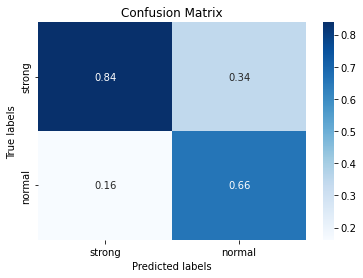

In [239]:
result_pred(y_true,y_pred)

In [241]:
def print_confMatrix(y_test,y_test_pred):
    cm=confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Greens")
    plt.show()

In [246]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.44      0.57      1117
           1       0.66      0.93      0.77      1300

    accuracy                           0.70      2417
   macro avg       0.75      0.68      0.67      2417
weighted avg       0.74      0.70      0.68      2417



In [249]:
def print_confMatrix(y_test,y_test_pred):
    cm=confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,0])
    disp.plot(cmap="Greens")
    plt.show()

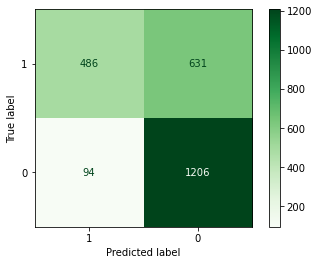

In [250]:
print_confMatrix(y_true,y_pred)

Come si puo evincere dal risultato -> si ottiene una' accuracy del 70% e una f-score avg del 67%. In particolare l' f score della classe 1(normal) ariva al 77% mentre per la classe 0(strong) solo al 57%

Risultati simili ma non eguagliati sono stati raggiunti anche dai precedente classificatori con risultato migliore,sorprendentemente, per il Naive Bayes